**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

**setting up libraries**

In [2]:
os.chdir('F:/Testing_ML/Titanic')

**importing datasets**

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
print(f"{train.isnull().sum()}")
print('********************')
print(f"{test.isnull().sum()}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#Age, Cabin,Embarked having null values in train data#
#Age,Fare,Cabin having null values in test data#

In [7]:
#Intution about the percentage of male / female survival rate
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead     = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True,figsize=(10,5))

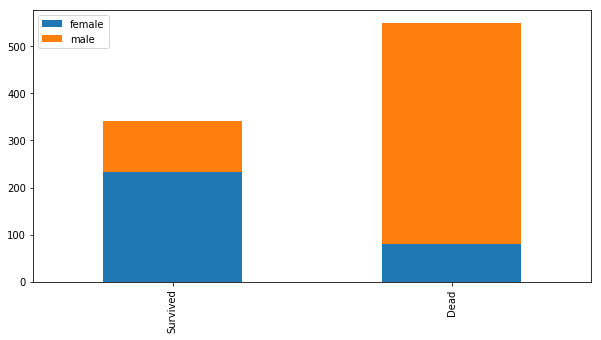

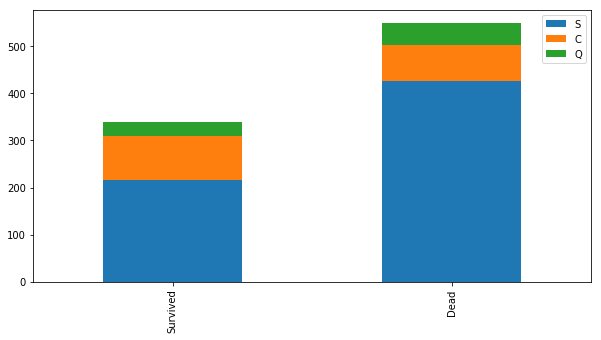

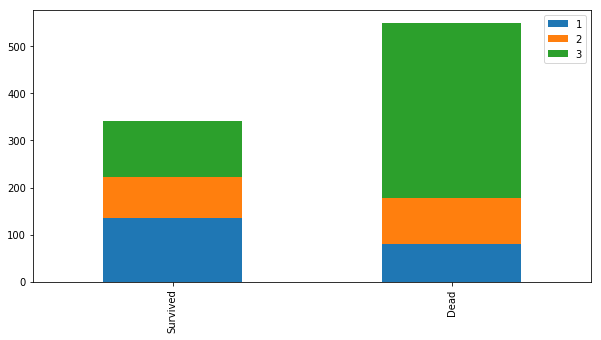

In [8]:
bar_chart('Sex')
bar_chart('Embarked')
bar_chart('Pclass')

In [9]:
#data wrangling
train_test_data = [train,test]

In [10]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [11]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [12]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

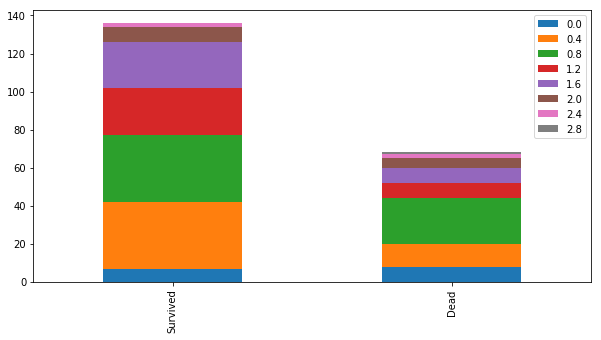

In [13]:
bar_chart('Cabin')

In [14]:
sex_mapping = {'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [15]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
em_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(em_mapping)

In [17]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Cabin  Embarked  
0         A/5 21171   7.2500    NaN       0.0  
1          PC 17599  71.2833    0.8       1.0  
2  STON/O2. 3101282   7.9250    NaN       0.0  
3            113803  53.1000    0.8       0.0  
4            373450   8.0500    NaN       0.0

In [18]:
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare  Cabin  Embarked  
0  34.5      0      0   330911   7.8292    NaN         2  
1  47.0      1      0   363272   7.0000    NaN         0  
2  62.0      0      0   240276   9.6875    NaN         2  
3  27.0      0      0   315154   8.6625    NaN         0  
4  22.0      1      1  3101298  12.2875    NaN         0

In [19]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [20]:
print(train.Title.value_counts())
print('**********')
print(test.Title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Capt          1
Don           1
Countess      1
Name: Title, dtype: int64
**********
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64


In [21]:
title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Mlle':3,'Major':3,'Col':3,'Mme':3,'Capt':3,'Lady':3,
                'Jonkheer':3,'Sir':3,'Don':3,'Countess':3,'Ms':3,'Dona':3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [22]:
for dataset in train_test_data:
    dataset.drop('Name',axis=1,inplace=True)
    dataset.drop('Ticket',axis=1,inplace=True)

In [23]:
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),inplace=True)

In [24]:
for dataset in train_test_data:
    dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [25]:
for dataset in train_test_data:
    dataset['Embarked'].fillna(dataset.groupby('Pclass')['Embarked'].transform('median'),inplace=True)

In [26]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 18,'Age'] = 0,
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 28) ,'Age'] = 1,
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 60) ,'Age'] = 2,
    dataset.loc[dataset['Age']  > 60,'Age'] = 3

In [27]:
for dataset in train_test_data:
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [32]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  \
0            1         0       3    0  1.0      1      0   0.0    2.0   
1            2         1       1    1  2.0      1      0   2.0    0.8   
2            3         1       3    1  1.0      0      0   0.0    2.0   
3            4         1       1    1  2.0      1      0   2.0    0.8   
4            5         0       3    0  2.0      0      0   0.0    2.0   

   Embarked  Title  
0       0.0      0  
1       1.0      2  
2       0.0      1  
3       0.0      2  
4       0.0      0

In [30]:
train.Fare.isnull().sum()

0

In [31]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 15,'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 30) ,'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100) ,'Fare'] = 2,
    dataset.loc[dataset['Age']  > 100,'Fare'] = 3

In [36]:
test.head()

PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0          892       3    0  2.0   0.0    2.0         2      0           1
1          893       3    1  2.0   0.0    2.0         0      2           2
2          894       2    0  3.0   0.0    2.0         2      0           1
3          895       3    0  1.0   0.0    2.0         0      0           1
4          896       3    1  1.0   0.0    2.0         0      2           3

In [34]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [35]:
for dataset in train_test_data:
    dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

In [37]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  \
0            1         0       3    0  1.0   0.0    2.0       0.0      0   
1            2         1       1    1  2.0   2.0    0.8       1.0      2   
2            3         1       3    1  1.0   0.0    2.0       0.0      1   
3            4         1       1    1  2.0   2.0    0.8       0.0      2   
4            5         0       3    0  2.0   0.0    2.0       0.0      0   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1

In [39]:
train_data = train.drop(['PassengerId','Survived'],axis=1)

In [40]:
target = train['Survived']

In [41]:
train_data.head()

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0       0.0      0           2
1       1    1  2.0   2.0    0.8       1.0      2           2
2       3    1  1.0   0.0    2.0       0.0      1           1
3       1    1  2.0   2.0    0.8       0.0      2           2
4       3    0  2.0   0.0    2.0       0.0      0           1

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [50]:
from sklearn.model_selection import KFold,cross_val_score

In [51]:
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [48]:
clf = KNeighborsClassifier(n_neighbors=13)

In [54]:
score= cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')

In [55]:
print(score)

[0.78888889 0.79775281 0.78651685 0.82022472 0.84269663 0.80898876
 0.82022472 0.80898876 0.79775281 0.86516854]


In [58]:
print(round(np.mean(score),2))

0.81


In [59]:
#DT
clf = DecisionTreeClassifier()

In [60]:
score= cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')

In [61]:
print(score)

[0.8        0.80898876 0.75280899 0.80898876 0.84269663 0.78651685
 0.85393258 0.83146067 0.74157303 0.80898876]


In [62]:
print(round(np.mean(score),2))

0.8


In [63]:
#RF
clf = RandomForestClassifier(n_estimators=13)

In [64]:
score= cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.8        0.84269663 0.76404494 0.82022472 0.85393258 0.78651685
 0.83146067 0.79775281 0.76404494 0.78651685]


In [65]:
print(round(np.mean(score),2))

0.8


In [66]:
#NB
clf= GaussianNB()
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.82222222 0.75280899 0.7752809  0.7752809  0.76404494 0.82022472
 0.82022472 0.83146067 0.82022472 0.82022472]


In [68]:
np.mean(score)

0.8001997503121098

In [69]:
clf=SVC()
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.8        0.80898876 0.80898876 0.80898876 0.82022472 0.82022472
 0.82022472 0.84269663 0.80898876 0.85393258]


In [72]:
round(np.mean(score),2)

0.82

In [73]:
clf = SVC()
clf.fit(train_data,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
test_data = test.drop('PassengerId',axis=1).copy()

In [75]:
prediction = clf.predict(test_data)

In [77]:
submission = pd.DataFrame({'PassengerID':test['PassengerId'],'Survived':prediction})

In [78]:
submission.to_csv('sub.csv',index=False)
submission.head()

PassengerID  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1